# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
from random import uniform 
from pprint import pprint
from citipy import citipy
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

# Remember to update the config file with your API key
from config import api_key

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"


## Generate Cities List

In [2]:
cities = []
duplicate_cities = []

cities_name = []
latitudes = []
longititudes = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries = []
dates = []


print("Beginning Data Retrieval")
print("*"*40)

while len(cities_name) < 500:
    
    # generate a 500 unique latitude and longitude values
    
    long = round(uniform(-180,180), 3) #longitude ranges from -180 to 180
    lat = round(uniform(-90, 90), 3) #latitude ranges from -90 to 90
    #feed into citipy the lat, long coordinates to return as city object
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    # add the city and it's country code to the cities set
    city_entry = f"{city_name},{country_code}"
    if city_entry not in cities:
        cities.append(city_entry)
        print(f"city generated: {city_entry}")
        query_url = url + "appid=" + api_key + "&q=" + city_entry + "?" + "&units=imperial"
        print(f"processing request for {city_entry}")

        weather_json = requests.get(query_url).json()
        if weather_json['cod'] == 200:
            cities_name.append(weather_json['name'])
            latitudes.append(weather_json['coord']['lat'])
            longititudes.append(weather_json['coord']['lon'])
            max_temps.append(weather_json['main']['temp_max'])
            humidities.append(weather_json['main']['humidity'])
            clouds.append(weather_json['clouds']['all'])
            wind_speeds.append(weather_json['wind']['speed'])
            countries.append(weather_json['sys']['country'])
            dates.append(weather_json['dt'])        
        else:
            print("City not found...skipping. \n")
            pass
    else:
        print(f"duplicate city: {city_entry}")
        duplicate_cities.append(city_entry)

print("*"*40)
print("End of Data Retrieval")



Beginning Data Retrieval
****************************************
city generated: tsihombe,mg
processing request for tsihombe,mg
City not found...skipping. 

city generated: thompson,ca
processing request for thompson,ca
city generated: saskylakh,ru
processing request for saskylakh,ru
city generated: jacareacanga,br
processing request for jacareacanga,br
city generated: ushuaia,ar
processing request for ushuaia,ar
city generated: galveston,us
processing request for galveston,us
city generated: rikitea,pf
processing request for rikitea,pf
city generated: edd,er
processing request for edd,er
city generated: punta arenas,cl
processing request for punta arenas,cl
city generated: albany,au
processing request for albany,au
city generated: arraial do cabo,br
processing request for arraial do cabo,br
city generated: hithadhoo,mv
processing request for hithadhoo,mv
city generated: busselton,au
processing request for busselton,au
city generated: dikson,ru
processing request for dikson,ru
duplica

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

print(len(cities_name))

500


In [4]:
print(len(duplicate_cities))

644


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Zip all lists together into tuples
city_ID = list(range(len(cities_name)))
weather_zip = zip(city_ID, cities_name, countries, dates, humidities, latitudes, longititudes, max_temps, clouds, wind_speeds)

# # # save the output file path "ISO-8859-1"
output_file = os.path.join("cities.csv")
 
# #  open the output file, create a header row, and then write the zipped object to the csv
with open(output_file, "w", encoding='utf-8') as datafile:
    writer = csv.writer(datafile)
    writer.writerow(["City_ID", "City", "Country","Date", "Humidity", "Lat", "Long", "Max Temp(F)","Cloudiness", "Wind Speed"])
    writer.writerows(weather_zip)



In [6]:
file = os.path.join("cities.csv")
weather_df = pd.read_csv(file, encoding= 'utf-8')

weather_df.head(30)

,City_ID,City,Country,Date,Humidity,Lat,Long,Max Temp(F),Cloudiness,Wind Speed
0,0,Thompson,CA,1600382570,36,55.74,-97.86,48.20,40,10.29
1,1,Saskylakh,RU,1600382571,79,71.92,114.08,46.62,0,8.75
2,2,Jacareacanga,BR,1600382571,41,-6.22,-57.75,87.80,65,2.51
3,3,Ushuaia,AR,1600382437,86,-54.80,-68.30,33.80,75,26.40
4,4,Galveston,US,1600382571,62,29.37,-94.97,88.00,20,4.70
5,5,Rikitea,PF,1600382571,79,-23.12,-134.97,72.12,86,21.61
6,6,Edd,ER,1600382572,67,13.93,41.69,88.99,66,7.27
7,7,Punta Arenas,CL,1600382288,69,-53.15,-70.92,37.40,40,34.45
8,8,Albany,US,1600382493,80,42.60,-73.97,62.01,100,7.02
9,9,Arraial do Cabo,BR,1600382572,83,-22.97,-42.03,73.40,0,13.87


In [7]:
weather_df.describe()

,City_ID,Date,Humidity,Lat,Long,Max Temp(F),Cloudiness,Wind Speed
count,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000
mean,249.500000,1.600383e+09,70.398000,20.569960,19.28892,65.46606,47.800000,8.144220
std,144.481833,7.086454e+01,20.891062,33.830411,90.31765,15.74989,38.711978,5.712129
min,0.000000,1.600382e+09,3.000000,-54.800000,-179.17000,19.36000,0.000000,0.400000
25%,124.750000,1.600383e+09,62.000000,-7.342500,-56.50250,51.78250,4.000000,3.620000
50%,249.500000,1.600383e+09,76.000000,24.280000,24.69500,67.91000,42.500000,6.930000
75%,374.250000,1.600383e+09,86.000000,50.030000,96.19000,78.08250,89.250000,11.410000
max,499.000000,1.600383e+09,100.000000,78.220000,178.42000,100.99000,100.000000,34.450000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_city_data = weather_df[weather_df["Humidity"] <= 100]
clean_city_data = clean_city_data.reset_index(drop=True)
clean_city_data.describe()

,City_ID,Date,Humidity,Lat,Long,Max Temp(F),Cloudiness,Wind Speed
count,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000
mean,249.500000,1.600383e+09,70.398000,20.569960,19.28892,65.46606,47.800000,8.144220
std,144.481833,7.086454e+01,20.891062,33.830411,90.31765,15.74989,38.711978,5.712129
min,0.000000,1.600382e+09,3.000000,-54.800000,-179.17000,19.36000,0.000000,0.400000
25%,124.750000,1.600383e+09,62.000000,-7.342500,-56.50250,51.78250,4.000000,3.620000
50%,249.500000,1.600383e+09,76.000000,24.280000,24.69500,67.91000,42.500000,6.930000
75%,374.250000,1.600383e+09,86.000000,50.030000,96.19000,78.08250,89.250000,11.410000
max,499.000000,1.600383e+09,100.000000,78.220000,178.42000,100.99000,100.000000,34.450000


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

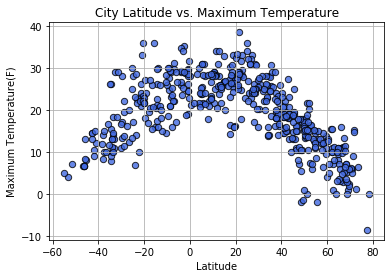

In [181]:
clean_city_data.plot.scatter(x='Lat',
                      y='Max Temp(F)',
                      c='RoyalBlue', marker="o", edgecolors="black", s = 40,  alpha=0.8, grid = True)

plt.title('City Latitude vs. Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature(F)')
plt.savefig('figure1.png')

This code analyzes the maximum temperature in a city with respect to it's latitude.  The trend seen here is that the closer a
city is towards the equator (represented by latitude zero), the more likely it will have a higher maximum temperature. 


## Latitude vs. Humidity Plot

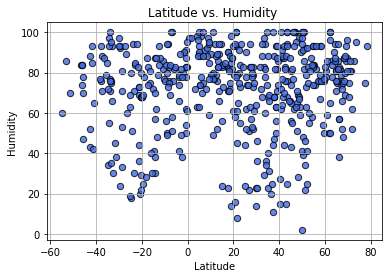

In [182]:
clean_city_data.plot.scatter(x='Lat',
                      y='Humidity',
                      c='RoyalBlue', marker="o", edgecolors="black", s = 40,  alpha=0.8, grid = True)

plt.title('Latitude vs. Humidity ')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('figure2.png')

This code analyzes the humidity in a city with respect to it's latitude.  This code selected only for cities with humididty =< 100%. 

## Latitude vs. Cloudiness Plot

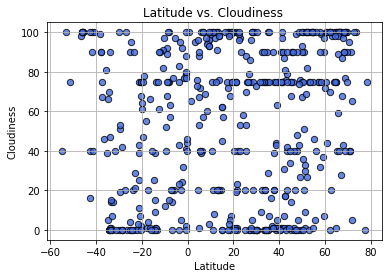

In [183]:
clean_city_data.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='RoyalBlue', marker="o", edgecolors="black", s = 40,  alpha=0.8, grid = True)

plt.title('Latitude vs. Cloudiness ')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('figure3.png')

This code analyzes a scatter plot of cloudiness in a city with respect to it's latitude.

## Latitude vs. Wind Speed Plot

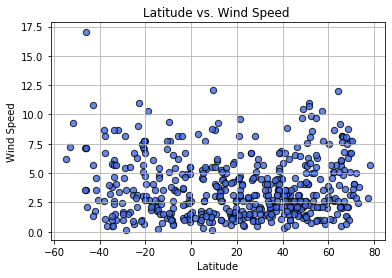

In [184]:
clean_city_data.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='RoyalBlue', marker="o", edgecolors="black", s = 40,  alpha=0.8, grid = True)

plt.title('Latitude vs. Wind Speed ')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('figure4.png')

This code analyzes a scatter plot of cloudiness in a city with respect to it's latitude.

## Linear Regression

In [15]:
north_hemi = clean_city_data[clean_city_data["Lat"] > 0]
north_hemi = north_hemi.reset_index(drop=True)
north_hemi.head(20)

,City_ID,City,Country,Date,Humidity,Lat,Long,Max Temp(F),Cloudiness,Wind Speed
0,0,Thompson,CA,1600382570,36,55.74,-97.86,48.20,40,10.29
1,1,Saskylakh,RU,1600382571,79,71.92,114.08,46.62,0,8.75
2,4,Galveston,US,1600382571,62,29.37,-94.97,88.00,20,4.70
3,6,Edd,ER,1600382572,67,13.93,41.69,88.99,66,7.27
4,8,Albany,US,1600382493,80,42.60,-73.97,62.01,100,7.02
5,12,Dikson,RU,1600382573,95,73.51,80.55,44.20,100,8.50
6,13,Bajmok,RS,1600382573,58,45.97,19.42,64.09,94,17.11
7,14,Atasū,KZ,1600382573,84,48.68,71.64,48.92,75,13.35
8,15,Kapaa,US,1600382573,58,22.08,-159.32,87.80,40,11.41
9,16,Kyzyl-Suu,KG,1600382574,78,42.34,78.00,48.31,99,5.17


In [16]:
south_hemi = clean_city_data[clean_city_data["Lat"] < 0]
south_hemi = south_hemi.reset_index(drop=True)
south_hemi.head(20)

,City_ID,City,Country,Date,Humidity,Lat,Long,Max Temp(F),Cloudiness,Wind Speed
0,2,Jacareacanga,BR,1600382571,41,-6.22,-57.75,87.80,65,2.51
1,3,Ushuaia,AR,1600382437,86,-54.80,-68.30,33.80,75,26.40
2,5,Rikitea,PF,1600382571,79,-23.12,-134.97,72.12,86,21.61
3,7,Punta Arenas,CL,1600382288,69,-53.15,-70.92,37.40,40,34.45
4,9,Arraial do Cabo,BR,1600382572,83,-22.97,-42.03,73.40,0,13.87
5,10,Hithadhoo,MV,1600382572,81,-0.60,73.08,82.13,81,11.32
6,11,Busselton,AU,1600382311,57,-33.65,115.33,46.99,0,9.60
7,17,Saldanha,ZA,1600382574,81,-33.01,17.94,51.80,0,2.24
8,19,Geraldton,AU,1600382574,75,-28.77,114.60,46.40,0,6.93
9,21,Cape Town,ZA,1600382342,93,-33.93,18.42,52.00,18,2.24


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as sts

correlation = sts.pearsonr(north_hemi['Lat'], north_hemi['Max Temp(F)'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is -0.82
The p-value is 1.7732298185697336e-84


The r-squared is: 0.6557865620245418


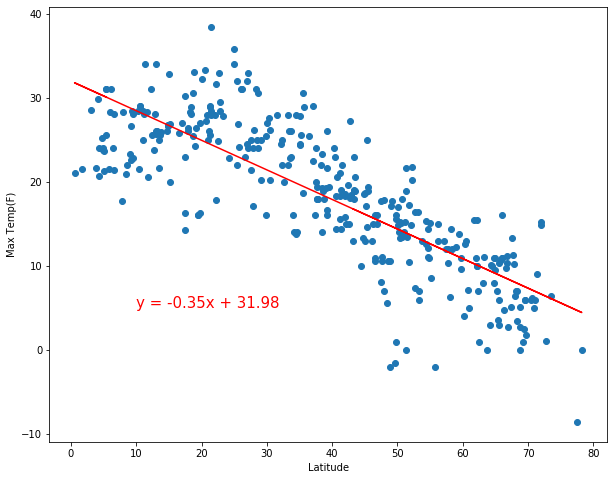

In [176]:



# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(north_hemi['Lat'], north_hemi['Max Temp(F)'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = north_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(north_hemi['Lat'],  north_hemi['Max Temp(F)'])

# Plot the regression line
plt.plot(north_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (10, 5), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model shows that the independent variable, Latitude in northern hemisphere,  has on a dependent variable, Max Temperature. There appears to be a negative linear relationship between northern hemisphere latitude and max temperature. This makes sense as the farther away north one travels, the more likely to visit areas with cooler max temper

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
correlation = sts.pearsonr(south_hemi['Lat'], south_hemi['Max Temp(F)'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.79
The p-value is 1.625683231555873e-33


The r-squared is: 0.5285458696189261


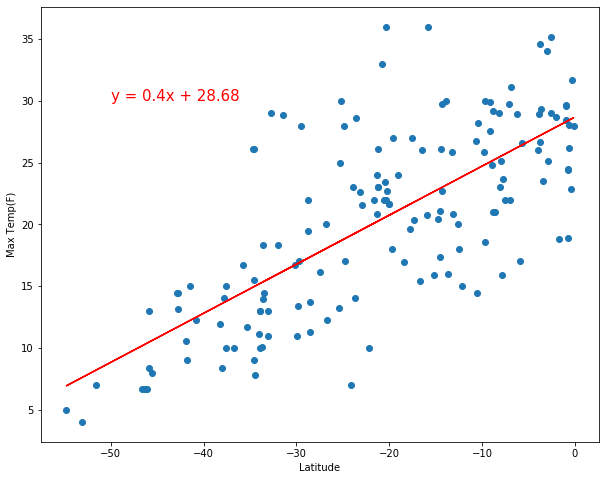

In [178]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(south_hemi['Lat'], south_hemi['Max Temp(F)'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = south_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(south_hemi['Lat'],  south_hemi['Max Temp(F)'])

# Plot the regression line
plt.plot(south_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model shows that the independent variable, Latitude in southern hemisphere,  has on a dependent variable, Max Temperature. There appears to be a positive linear relationship between southern hemisphere latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
correlation = sts.pearsonr(north_hemi['Lat'], north_hemi['Humidity'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.02
The p-value is 0.7247754794736533


The r-squared is: 0.0003608164244388669


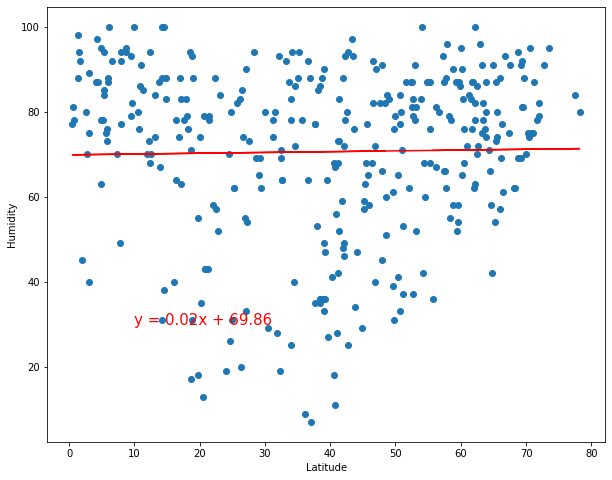

In [22]:



# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(north_hemi['Lat'], north_hemi['Humidity'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = north_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(north_hemi['Lat'],  north_hemi['Humidity'])

# Plot the regression line
plt.plot(north_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model is trying to show if the independent variable, latitude in northern hemisphere,  has on a dependent variable, humidity. There appears does not appear to be relationship between northern hemisphere latitude and humidity.   

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
correlation = sts.pearsonr(south_hemi['Lat'], south_hemi['Humidity'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.01
The p-value is 0.8853288931587875


The r-squared is: 0.0001372744771904735


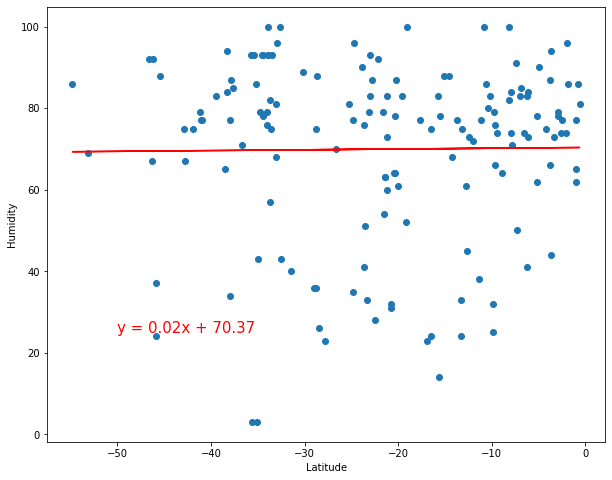

In [24]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(south_hemi['Lat'], south_hemi['Humidity'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = south_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(south_hemi['Lat'],  south_hemi['Humidity'])

# Plot the regression line
plt.plot(south_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model is trying to show if the independent variable, latitude in southern hemisphere,  has on a dependent variable, humidity. There appears does not appear to be relationship between southern hemisphere latitude and humidity.   

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [25]:
correlation = sts.pearsonr(north_hemi['Lat'], north_hemi['Cloudiness'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.14
The p-value is 0.010714192759913355


The r-squared is: 0.018779488297361622


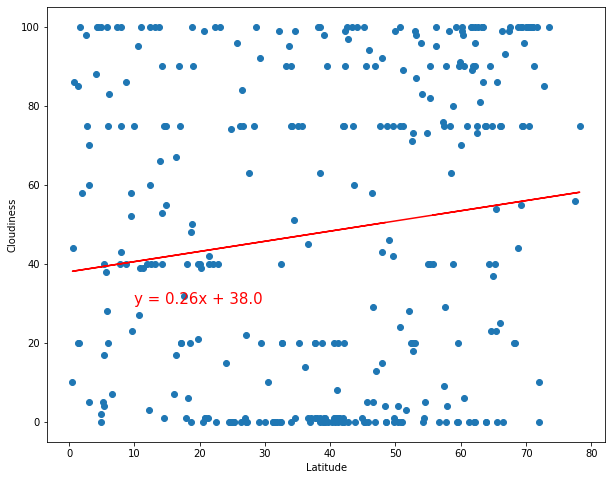

In [26]:

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(north_hemi['Lat'], north_hemi['Cloudiness'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = north_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(north_hemi['Lat'],  north_hemi['Cloudiness'])

# Plot the regression line
plt.plot(north_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model is trying to show if the independent variable, latitude in northern hemisphere,  has on a dependent variable, cloudiness. There appears does not appear to be relationship between northern hemisphere latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
correlation = sts.pearsonr(south_hemi['Lat'], south_hemi['Cloudiness'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.02
The p-value is 0.7989599124026524


The r-squared is: 0.00042808239470438467


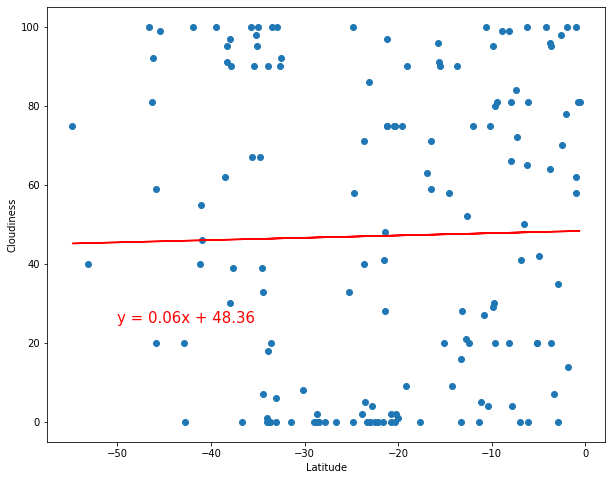

In [28]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(south_hemi['Lat'], south_hemi['Cloudiness'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = south_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(south_hemi['Lat'],  south_hemi['Cloudiness'])

# Plot the regression line
plt.plot(south_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model is trying to show if the independent variable, latitude in southern hemisphere,  has on a dependent variable, cloudiness. There  does not appear to be relationship between southern hemisphere latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [29]:
correlation = sts.pearsonr(north_hemi['Lat'], north_hemi['Wind Speed'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.09
The p-value is 0.10082401769298543


The r-squared is: 0.00780765772973992


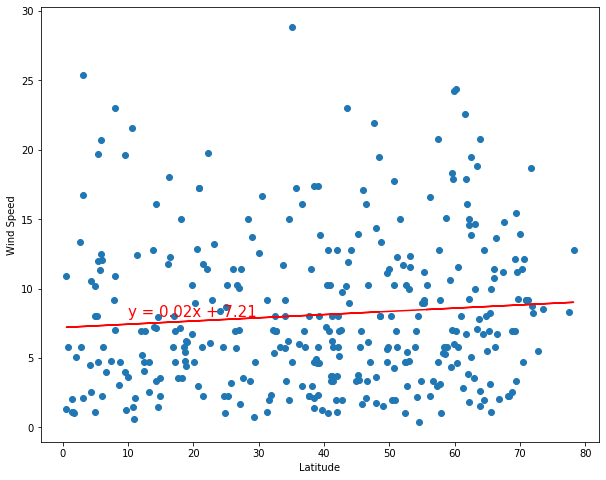

In [30]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(north_hemi['Lat'], north_hemi['Wind Speed'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = north_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(north_hemi['Lat'],  north_hemi['Wind Speed'])

# Plot the regression line
plt.plot(north_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (10, 8), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model is trying to show if the independent variable, latitude in northern hemisphere,  has on a dependent variable, wind speed. There  does not appear to be relationship between northern hemisphere latitude and windspeed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [31]:
correlation = sts.pearsonr(south_hemi['Lat'], south_hemi['Wind Speed'])

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is -0.27
The p-value is 0.0006298209274421158


The r-squared is: 0.04450316191482271


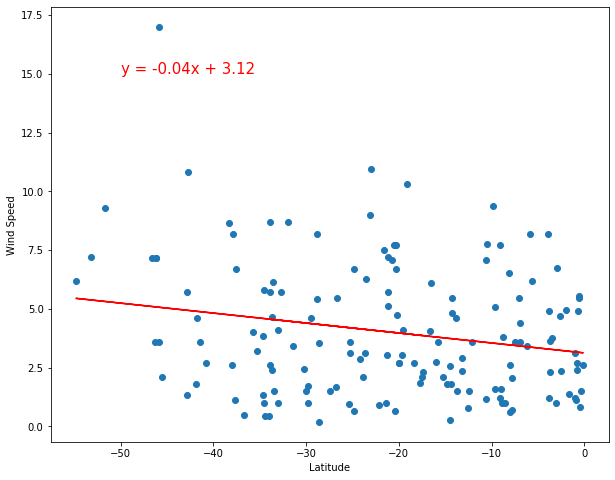

In [180]:
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(south_hemi['Lat'], south_hemi['Wind Speed'])

# Calculate the predictions for each value of x (# Rooms)
regression_values = south_hemi['Lat'] * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(south_hemi['Lat'],  south_hemi['Wind Speed'])

# Plot the regression line
plt.plot(south_hemi['Lat'], regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This linear regression is model is trying to show if the independent variable, latitude in southern hemisphere,  has on a dependent variable, wind speed. There  does not appear to be relationship between southern hemisphere latitude and windspeed.